In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/') 
from cvaegan_conv3 import *
from cvaegan3 import CVAEGAN
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

0.547902


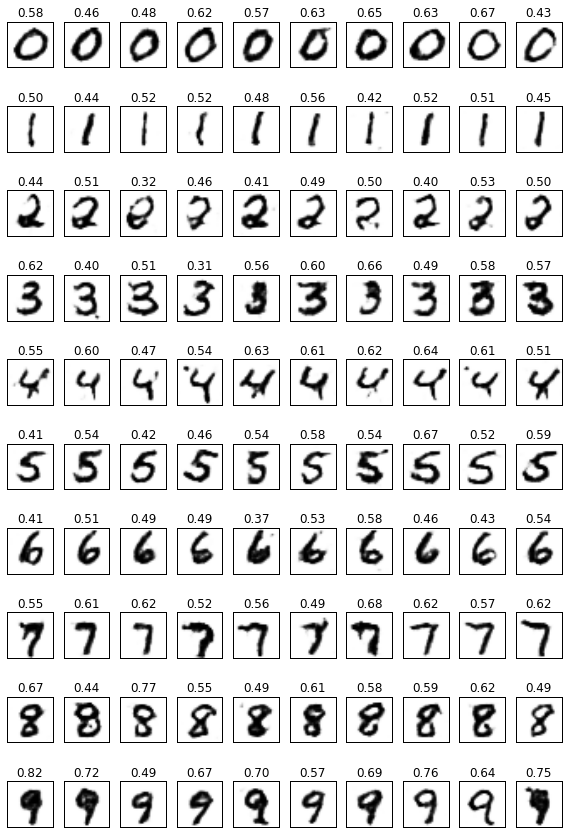

In [2]:
# Load
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator, 
        batch_size = 100, z_dim = 50, x_dim = 784,
        learning_rate = 1e-5, num_epochs = 5, load=True, lr_decay=0.95, lr_decay_freq=1000,
        load_file = '../experiments/cvaegan/cvaegan_conv_checkpoint_lr_0.0001_alpha_1.0_beta_0.0001_gamma_100.0_mnist-5', 
        checkpoint_name='test'
)
num_examples = 10

info = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, info=info)
gen_dis_real = sess.run(model.dis_real, feed_dict={model.x:generated_images})[:,-1] 
print np.mean(gen_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(gen_dis_real[10*i+j]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/CVAEGAN_conv_gen_1')
plt.show()

In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/') 
from cvaegan_conv2 import *
from cvaegan2 import CVAEGAN
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

1.0


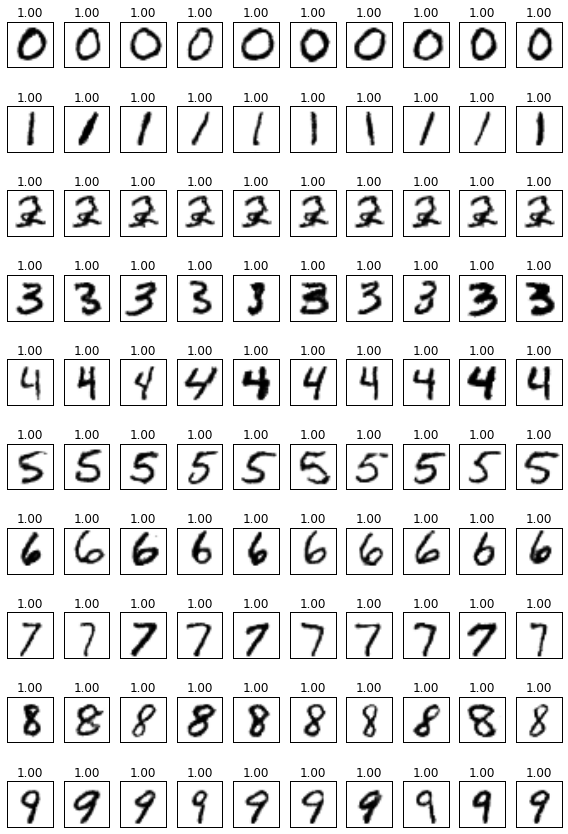

In [2]:
# Load
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator, 
        batch_size = 100, z_dim = 50, x_dim = 784,
        learning_rate = 1e-5, num_epochs = 5, load=True, lr_decay=0.95, lr_decay_freq=1000,
        load_file = '../experiments/cvaegan/cvaegan_conv_checkpoint_lr_0.0001_alpha_10.0_beta_0.0001_gamma_100.0-20', 
        checkpoint_name='test'
)
num_examples = 10

info = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, info=info)
gen_dis_real = sess.run(model.dis_real, feed_dict={model.x:generated_images})[:,-1] 
print np.mean(gen_dis_real)
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(gen_dis_real[10*i+j]))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/CVAEGAN_conv_gen_1')
plt.show()

In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/') 
from cvaegan_conv3 import *
from cvaegan3 import CVAEGAN
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
from dataset import DataSet
import scipy.io as sio
from tensorflow.python.framework import dtypes
def mat2dataset(filepath):
    dat = sio.loadmat(filepath)
    x = dat['X']
    y = dat['y']
    y[y==10] = 0
    y = np.array(np.arange(10)==y, dtype=int)
    x = x.reshape((32*32*3,-1)).T
    x = x.astype(float)/255.
    return DataSet(x,y,dtype=dtypes.float32, reshape=False) 
 
svhn_test = mat2dataset('SVHN/test_32x32.mat')

In [3]:
imgs = svhn_test.images[:100]
labels = svhn_test.labels[:100] 
def mat2dataset(filepath):
    dat = sio.loadmat(filepath)
    x = dat['X']
    y = dat['y']
    y[y==10] = 0
    y = np.array(np.arange(10)==y, dtype=int)
    x = x.reshape((32*32*3,-1)).T
    x = x.astype(float)/255.
    return DataSet(x,y,dtype=dtypes.float32, reshape=False) 

svhn_train = mat2dataset('SVHN/train_32x32.mat')
svhn_test = mat2dataset('SVHN/test_32x32.mat')


# Load
sess = tf.InteractiveSession()
build_encoder = Encoder(256, x_width = 32)
build_decoder = Decoder(256, x_width = 32,x_depth = 3)
build_discriminator = Discriminator(512, x_width = 32)

model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator,
        batch_size = 100, z_dim = 50, x_dim = 3 *32*32,
        learning_rate = 1e-5, num_epochs = 5, load=True, lr_decay=0.95, lr_decay_freq=1000,
        load_file = 
    '../experiments/cvaegan/cvaegan_checkpoint_lr_0.0001_alpha_10.0_beta_0.0001_gamma_100.0_SVHN_net_3-20', 
        checkpoint_name='test'
)

generated_images = model.reconstruct(imgs,labels)



# #images, info = mnist.test.next_batch(100)
# num_examples = 10
# batch_size = 100

# # VAEGAN
# #generated_images = model.generate(num=batch_size)

# # CVAEGAN 
# labels = np.repeat(np.identity(10), 10, axis=0)
# generated_images = model.generate(num=batch_size, info=labels)


# plt.figure(figsize=(8,12))
# for i in xrange(9):
#     for j in xrange(num_examples):
#         plt.subplot(10, num_examples, 10*i+j+1)
#         plt.imshow(generated_images[10*i+j,].reshape(32,32,3))
#         plt.xticks([])
#         plt.yticks([])
# plt.tight_layout()
# #plt.savefig('images/svhn_cvaegan_fc_gen')
# plt.show()
 

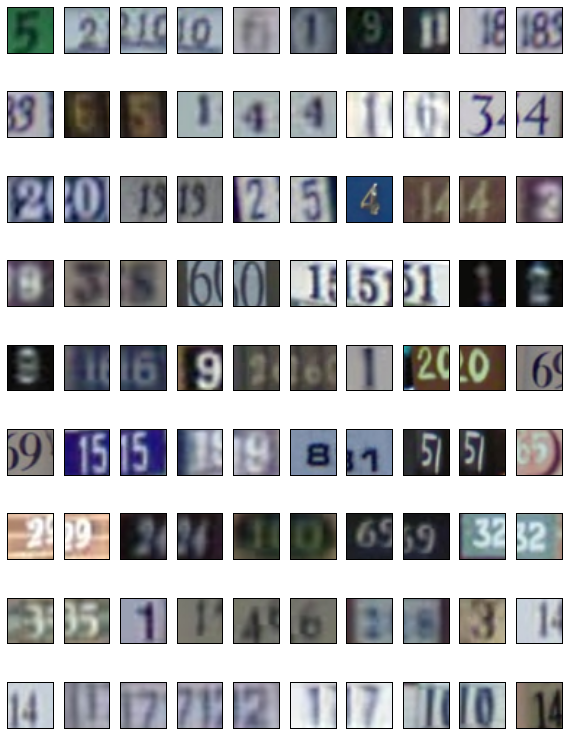

This is generated images


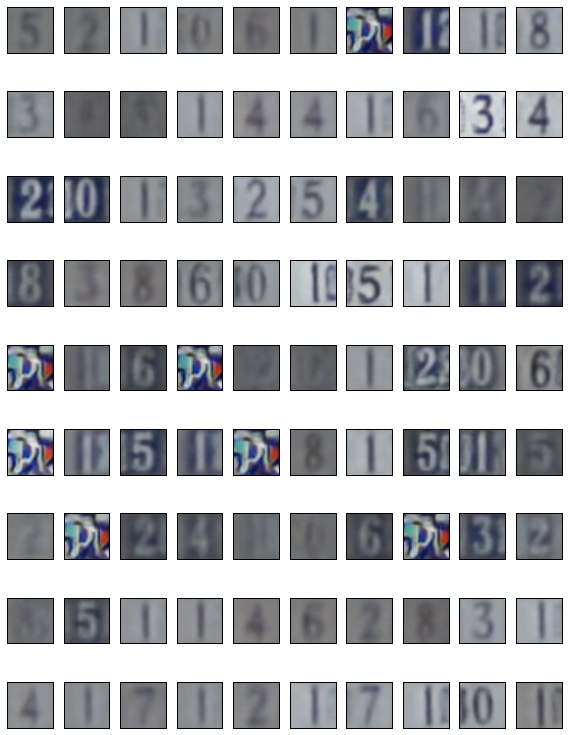

In [7]:
num_examples = 10
plt.figure(figsize=(8,12))
for i in xrange(9):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(imgs[10*i+j,].reshape(32,32,3))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/svhn_cvaegan_fc_gen')
plt.show()
print 'This is generated images'
num_examples = 10
plt.figure(figsize=(8,12))
for i in xrange(9):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(32,32,3))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/svhn_cvaegan_fc_gen')
plt.show()

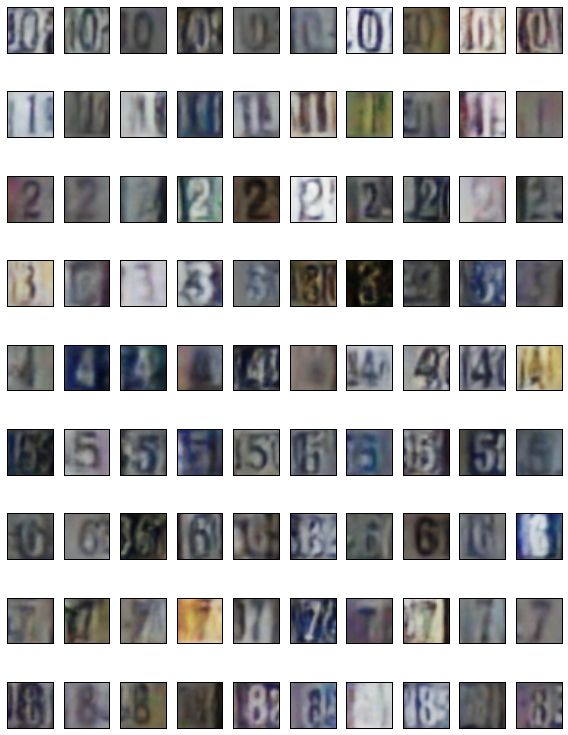

In [2]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/') 
from cvaegan_conv3 import *
from cvaegan3 import CVAEGAN
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
sess = tf.InteractiveSession()
build_encoder = Encoder(256, x_width = 32)
build_decoder = Decoder(256, x_width = 32,x_depth = 3)
build_discriminator = Discriminator(512, x_width = 32)

model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator,
        batch_size = 100, z_dim = 50, x_dim = 3 *32*32,
        learning_rate = 1e-5, num_epochs = 5, load=True, lr_decay=0.95, lr_decay_freq=1000,
        load_file = 
    '../experiments/cvaegan/cvaegan_checkpoint_lr_0.0001_alpha_10.0_beta_0.0001_gamma_100.0_SVHN_net_3-20', 
        checkpoint_name='test'
)


#images, info = mnist.test.next_batch(100)
num_examples = 10
batch_size = 100

# VAEGAN
#generated_images = model.generate(num=batch_size)

# CVAEGAN 
labels = np.repeat(np.identity(10), 10, axis=0)
generated_images = model.generate(num=batch_size, info=labels)


plt.figure(figsize=(8,12))
for i in xrange(9):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(32,32,3))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/svhn_cvaegan_fc_gen')
plt.show()
 

In [1]:
import sys
sys.path.append('../core/')
sys.path.append('../networks/') 
from cvaegan_conv4 import *
from cvaegan4 import CVAEGAN
from misc_ops import *

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

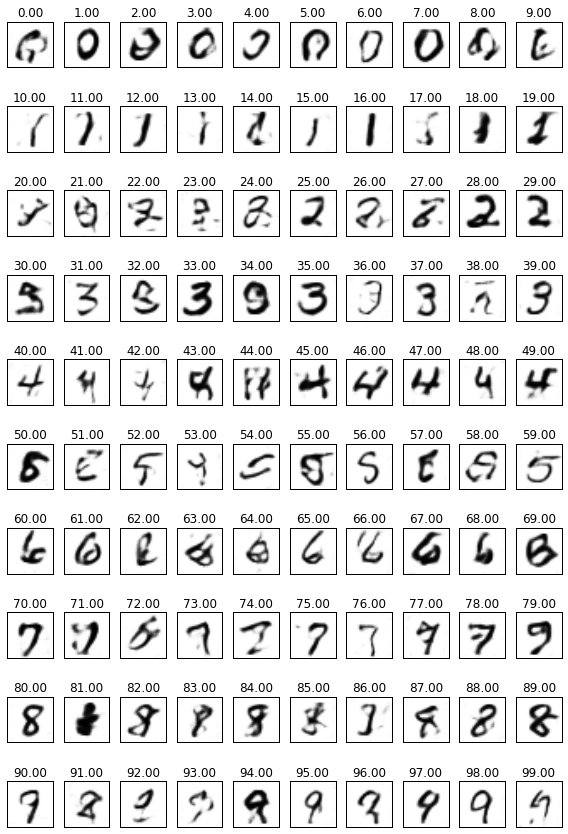

In [2]:
# Load
sess = tf.InteractiveSession()
build_encoder = Encoder(512)
build_decoder = Decoder(512)
build_discriminator = Discriminator(1024)


model = CVAEGAN(sess, build_encoder, build_decoder, build_discriminator, 
        batch_size = 100, z_dim = 50, x_dim = 784,
        learning_rate = 1e-5, num_epochs = 5, load=True, lr_decay=0.95, lr_decay_freq=1000,
        load_file = '../experiments/cvaegan/cvaegan_checkpoint_lr_0.001_alpha_1.0_beta_1.0_gamma_1.0_mnist_net_4_v4-30', 
        checkpoint_name='test'
)
num_examples = 10

info = np.repeat(np.identity(10), num_examples, axis=0)
generated_images = model.generate(num=100, info=info) 
plt.figure(figsize=(8,12))
for i in xrange(10):
    for j in xrange(num_examples):
        plt.subplot(10, num_examples, 10*i+j+1)
        plt.imshow(generated_images[10*i+j,].reshape(28, 28), cmap='gray_r')
        plt.title('{:.2f}'.format(10*i+j))
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()
#plt.savefig('images/CVAEGAN_conv_gen_1')
plt.show()